## City Data Correlations and Analysis for Fintech Index

This project aims to analyze Fintech development in China on the city level from 2010-2018. Below, we'll start by importing the csv file and visualizing our missing values. Our target or dependent variable here is "Fintech" which is an index calculated from several other factors that represents the level of fintech development. It would be interesting to see how are other features impact Fintech development. 

In [1]:
import pandas as pd 

data = pd.read_csv("/Users/jessicaparker/Desktop/Data/Fintech Project/city_data.csv")

In [2]:
data_year = data.sort_values("year")
data_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2601 entries, 0 to 2600
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_name          2601 non-null   object 
 1   year               2601 non-null   int64  
 2   GDPpc              2528 non-null   float64
 3   Industrialization  2585 non-null   float64
 4   Loans              2307 non-null   float64
 5   Deposits           2307 non-null   float64
 6   Savings            2303 non-null   float64
 7   Fintech            2311 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 182.9+ KB


<AxesSubplot:>

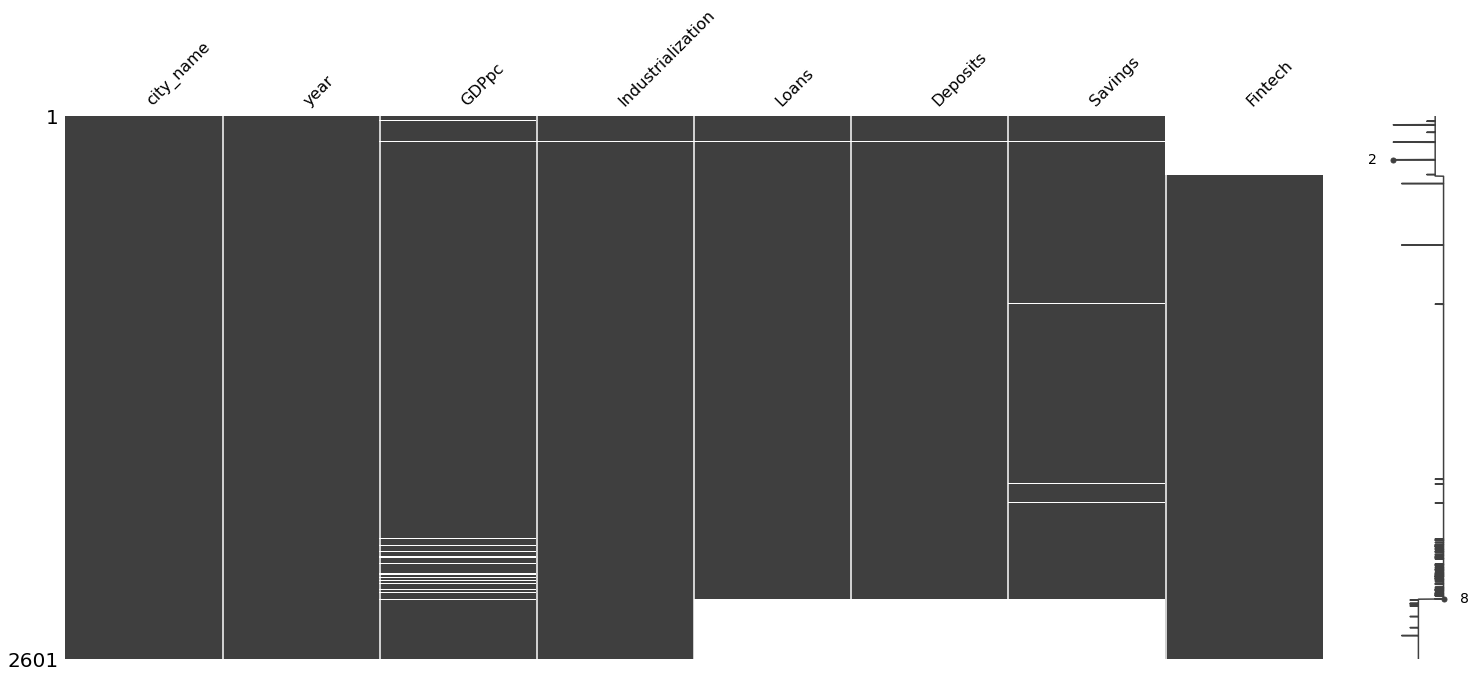

In [3]:
import missingno as msno
%matplotlib inline
msno.matrix(data_year)

As we can see above, there are a lot of missing values! We will decide what to do with them later, but first lets drop all of our null values and do some visualizations. 

First we drop all of the null values and get someinformation about our dataset. 

In [4]:
data_year_nn = data_year.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
data_year_nn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 1388 to 700
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_name          1948 non-null   object 
 1   year               1948 non-null   int64  
 2   GDPpc              1948 non-null   float64
 3   Industrialization  1948 non-null   float64
 4   Loans              1948 non-null   float64
 5   Deposits           1948 non-null   float64
 6   Savings            1948 non-null   float64
 7   Fintech            1948 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 137.0+ KB


We can see here that we have successfully dropped all of the null values and have a complete dataset. 

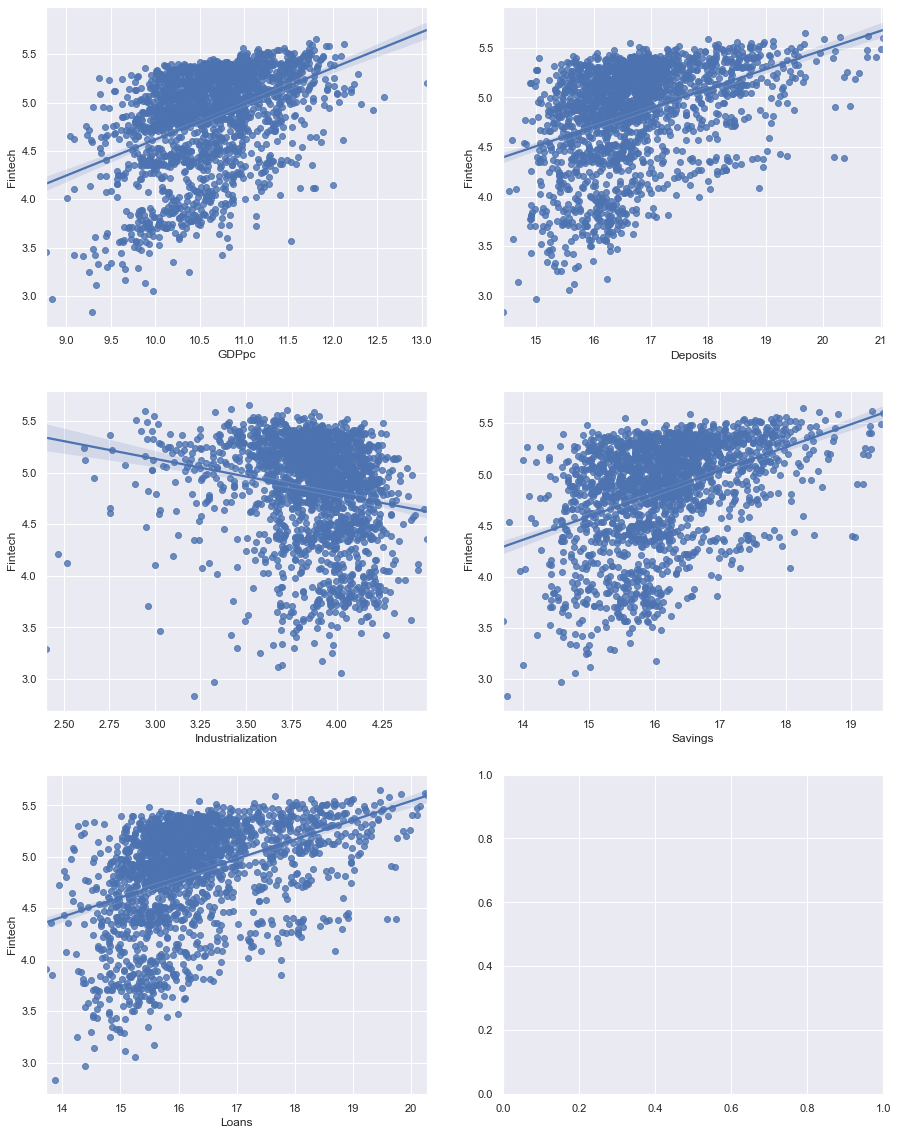

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

y = data_year_nn["Fintech"]

sns.set(rc={'figure.figsize':(15,20)})
fig, axs = plt.subplots(nrows = 3, ncols = 2)

sns.regplot(x='GDPpc', y=y, data=data_year_nn, ax=axs[0][0])
sns.regplot(x='Industrialization', y=y, data= data_year_nn , ax=axs[1][0])
sns.regplot(x='Loans', y=y, data= data_year_nn , ax=axs[2][0])
sns.regplot(x='Deposits',y=y, data=data_year_nn, ax=axs[0][1])
# sns.regplot(x='BUS YEARS', y=y, data= merged_shuff , ax=axs[4][0])
sns.regplot(x='Savings',y=y, data=data_year_nn, ax=axs[1][1])
plt.savefig("target_relationships.png")

Accoring to these regplots, we can see that there may some satistically significant coorelations. 
Before diving into our statistical analysis, lets clean the original data set. 

In [6]:
data_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2601 entries, 0 to 2600
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_name          2601 non-null   object 
 1   year               2601 non-null   int64  
 2   GDPpc              2528 non-null   float64
 3   Industrialization  2585 non-null   float64
 4   Loans              2307 non-null   float64
 5   Deposits           2307 non-null   float64
 6   Savings            2303 non-null   float64
 7   Fintech            2311 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 182.9+ KB


<AxesSubplot:>

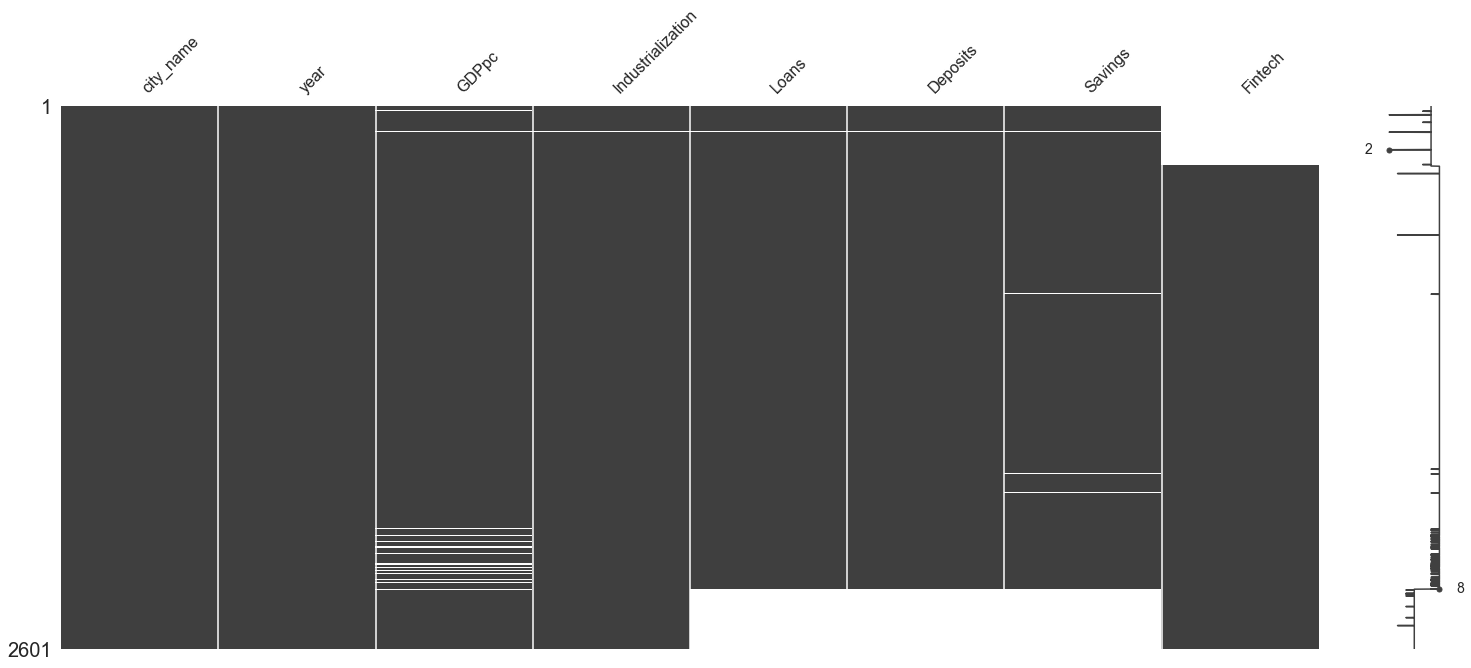

In [7]:
%matplotlib inline
msno.matrix(data_year)

In [8]:
data_year[data_year["year"]==2010].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 0 to 153
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_name          289 non-null    object 
 1   year               289 non-null    int64  
 2   GDPpc              283 non-null    float64
 3   Industrialization  286 non-null    float64
 4   Loans              286 non-null    float64
 5   Deposits           286 non-null    float64
 6   Savings            286 non-null    float64
 7   Fintech            0 non-null      float64
dtypes: float64(6), int64(1), object(1)
memory usage: 20.3+ KB


Since we do not have the Fintech index for 2010, we will excude the values from this year. For Industrialization, we will fill in the values with the mean for that year. For Loans, Deposits, and Savings, we will fill in the data following the trend by copying the values fro the previous year and increasing them by the percentage of growht from 2017-2018. 

In [9]:
data_2018 = data_year[data_year["year"]==2018]

In [10]:
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 289 entries, 1727 to 2600
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_name          289 non-null    object 
 1   year               289 non-null    int64  
 2   GDPpc              287 non-null    float64
 3   Industrialization  283 non-null    float64
 4   Loans              0 non-null      float64
 5   Deposits           0 non-null      float64
 6   Savings            0 non-null      float64
 7   Fintech            289 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 20.3+ KB


### Dropping missing rows

There are some null rows prior to 2018 that cannot be filled using trends from the data, so they will be dropped. 

In [11]:
not_2018 = data_year[data_year["year"]!=2018]
not_2018 = not_2018.dropna(axis = 0)
not_2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1948 entries, 1388 to 700
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_name          1948 non-null   object 
 1   year               1948 non-null   int64  
 2   GDPpc              1948 non-null   float64
 3   Industrialization  1948 non-null   float64
 4   Loans              1948 non-null   float64
 5   Deposits           1948 non-null   float64
 6   Savings            1948 non-null   float64
 7   Fintech            1948 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 137.0+ KB


As we can see here, we have a clean dataset since we dropped all of our null values. We no longer have data from the year 2010 because there was no Fintech Index for that year. 

Next we will combine the two datasets to make our workflow a bit easier. 

In [12]:
merged = pd.concat([not_2018, data_2018], ignore_index = True)

In [13]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_name          2237 non-null   object 
 1   year               2237 non-null   int64  
 2   GDPpc              2235 non-null   float64
 3   Industrialization  2231 non-null   float64
 4   Loans              1948 non-null   float64
 5   Deposits           1948 non-null   float64
 6   Savings            1948 non-null   float64
 7   Fintech            2237 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 139.9+ KB


As we can see from above, the loans, deposits, and savings columns have a lot of null values. Let's try to fill them up by looking at trends in the data. We will start by calculating the perentage increase in the given feature from 2016-2017, fill in the 2018 values with the values from the previous year, and increase them by the original perfentage increase that we fround. 

## Filling in Missing Values 

### The Loans Column 

For the dataframe for the year 2016, we chose only the first 220 values to compute the percentage increase. Since we want an overall increase between all the cities, this will be the easiest way to do it. 

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

data_2017 = merged[merged["year"] ==2017]
data_2016 = merged[merged["year"] ==2016].head(220)


<AxesSubplot:xlabel='Loans'>

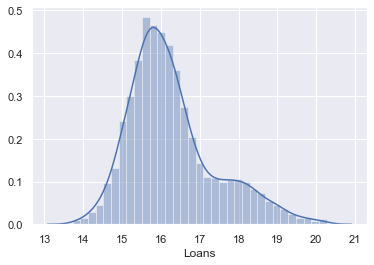

In [15]:
sns.distplot(merged["Loans"])

Since our values are all scaled, the follow a normalized distribution so it is okay to use the mean in this case. 

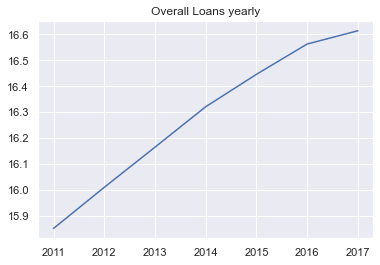

In [16]:
def plot_yearly_mean(data, column):
    column_mean = data.groupby("year")[column].mean()
    plt.title("Overall "+ column + " yearly")
    return plt.plot(column_mean)

plot_yearly_mean(merged, "Loans")

As can be see by this graph, the median of this series has increased at a steady pace throughout the years and the values that will be filled in should follow the trend. 

In [17]:
def percentage_increase(data_new,data_old, column): 
    increase = data_new[column].mean() - data_old[column].mean()
    percentage = (increase/data_new[column].median())*100
    return percentage

In [18]:
percentage_increase(data_2017, data_2016, "Loans")

0.5042213167576574

Now lets fill in the values of 2018 from the values of the previous year. 

In [19]:
merged["Loans"].fillna(method='ffill', inplace=True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_name          2237 non-null   object 
 1   year               2237 non-null   int64  
 2   GDPpc              2235 non-null   float64
 3   Industrialization  2231 non-null   float64
 4   Loans              2237 non-null   float64
 5   Deposits           1948 non-null   float64
 6   Savings            1948 non-null   float64
 7   Fintech            2237 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 139.9+ KB


/Users/jessicaparker/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


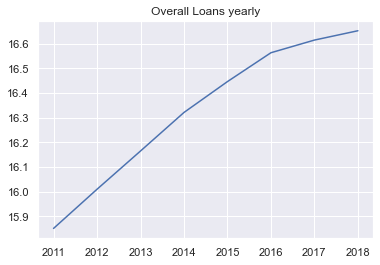

In [20]:
merged[merged["year"]==2018]["Loans"]=(merged[merged["year"]==2018]["Loans"])*1+percentage_increase(data_2017, data_2016, "Loans")
plot_yearly_mean(merged, "Loans")

There the values that we filled in, successfully follow the slowly plateauting trend. 

### Filling in the Deposits Columns

In [21]:
percentage_increase(data_2017, data_2016, "Deposits")

0.5230909416141083

In [22]:
def percentage_increase_median(data_new,data_old, column): 
    increase = data_new[column].median() - data_old[column].median()
    percentage = (increase/data_new[column].median())*100
    return percentage

In [23]:
merged["Deposits"].fillna(method='ffill', inplace=True)

/Users/jessicaparker/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


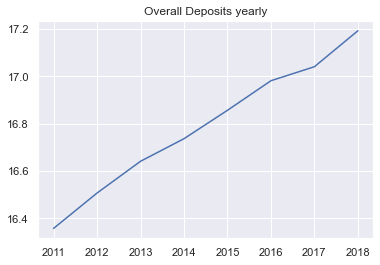

In [24]:
merged[merged["year"]==2018]["Deposits"]=(merged[merged["year"]==2018]["Deposits"])*percentage_increase_median(data_2017, data_2016, "Deposits")
plot_yearly_mean(merged, "Deposits")

In [25]:
merged[merged["year"]==2018]["Deposits"]

1948    17.192984
1949    17.192984
1950    17.192984
1951    17.192984
1952    17.192984
          ...    
2232    17.192984
2233    17.192984
2234    17.192984
2235    17.192984
2236    17.192984
Name: Deposits, Length: 289, dtype: float64

### Savings Column 

In [26]:
data_2015 = merged[merged["year"]==2015]
data_2018 = merged[merged["year"]==2018]

In [27]:
merged["Savings"].fillna(method='ffill', inplace=True)
percentage_increase_median(data_2017, data_2016, "Savings")

0.6453829953977639

In [44]:
merged[merged["year"]==2018]["Deposits"]= merged[merged["year"]==2018]["Savings"] * 1+ (percentage_increase_median(data_2017, data_2016, "Savings"))

/Users/jessicaparker/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1948    17.192984
1949    17.192984
1950    17.192984
1951    17.192984
1953    17.192984
          ...    
2232    17.192984
2233    17.192984
2234    17.192984
2235    17.192984
2236    17.192984
Name: Deposits, Length: 282, dtype: float64

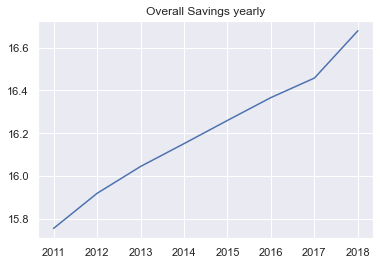

In [41]:
plot_yearly_mean(merged, "Savings")

In [30]:
merged.info

<bound method DataFrame.info of      city_name  year      GDPpc  Industrialization      Loans   Deposits  \
0          沈阳市  2011  11.193381           3.904797  18.048017  18.303660   
1          白银市  2011   9.935955           4.219508  14.627602  15.185225   
2          眉山市  2011  10.034209           4.061994  15.051475  15.846161   
3          绥化市  2011   9.656115           2.402430  15.053930  15.678331   
4          威海市  2011  11.229448           3.997466  16.322294  16.693642   
...        ...   ...        ...                ...        ...        ...   
2232     乌鲁木齐市  2018  11.375914           3.422959  16.651881  17.192984   
2233       毕节市  2018  10.267922           3.431080  16.651881  17.192984   
2234       铜陵市  2018  11.232206           4.107754  16.651881  17.192984   
2235       许昌市  2018  11.066576           3.994892  16.651881  17.192984   
2236       龙岩市  2018  11.414816           3.966511  16.651881  17.192984   

        Savings   Fintech  
0     17.434362  4.270536  

There are still a few missing values in the Industrialization and GDPpc column, so let's get rid of those. 

In [31]:
merged = merged.dropna(axis = 0)

In [32]:
merged.info

<bound method DataFrame.info of      city_name  year      GDPpc  Industrialization      Loans   Deposits  \
0          沈阳市  2011  11.193381           3.904797  18.048017  18.303660   
1          白银市  2011   9.935955           4.219508  14.627602  15.185225   
2          眉山市  2011  10.034209           4.061994  15.051475  15.846161   
3          绥化市  2011   9.656115           2.402430  15.053930  15.678331   
4          威海市  2011  11.229448           3.997466  16.322294  16.693642   
...        ...   ...        ...                ...        ...        ...   
2232     乌鲁木齐市  2018  11.375914           3.422959  16.651881  17.192984   
2233       毕节市  2018  10.267922           3.431080  16.651881  17.192984   
2234       铜陵市  2018  11.232206           4.107754  16.651881  17.192984   
2235       许昌市  2018  11.066576           3.994892  16.651881  17.192984   
2236       龙岩市  2018  11.414816           3.966511  16.651881  17.192984   

        Savings   Fintech  
0     17.434362  4.270536  

And now when we check the second time we can see that once again, we have a full data frame. 

In [33]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2230 entries, 0 to 2236
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   city_name          2230 non-null   object 
 1   year               2230 non-null   int64  
 2   GDPpc              2230 non-null   float64
 3   Industrialization  2230 non-null   float64
 4   Loans              2230 non-null   float64
 5   Deposits           2230 non-null   float64
 6   Savings            2230 non-null   float64
 7   Fintech            2230 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 156.8+ KB


In [35]:
increase = data_2017["Loans"].median() - data_2017["Loans"].median()

In [36]:
increase

0.0

In [37]:
percentage = increase.div(data_2017["Loans"],fill_value=0)

AttributeError: 'numpy.float64' object has no attribute 'div'

In [ ]:
increase = data_2017["Loans"].sub(data_2016["Loans"],fill_value=0)

In [ ]:
percentage = increase.div(data_2017["Loans"],fill_value=0)

In [ ]:
percentage

In [ ]:
percentage

In [ ]:
merged["new"] = data_2017['Loans'] - data_2016['Loans']

In [ ]:
merged["new"]

In [ ]:
data_2017['Loans']

In [ ]:
data_2016['Loans']

In [ ]:
data_2017['Loans'] - data_2016['Loans']

In [ ]:
data_2017.info()

In [ ]:
data_2016.info()

In [ ]:
percentage

In [ ]:
diff = data_2017['Loans'].sub(data_2016['Loans'], fill_value=0)


In [ ]:
import seaborn as sns


y = 

sns.set(rc={'figure.figsize':(15,20)})
fig, axs = plt.subplots(nrows = 4, ncols = 2)

sns.regplot(x='AMOUNT GRANTED', y=y, data=data_year, ax=axs[0][0],label="Amount Granted" )
sns.regplot(x='BUS YEARS', y=y, data= data_year , ax=axs[1][0])
sns.regplot(x='HOME YEARS', y=y, data= data_year , ax=axs[2][0])
sns.regplot(x='AGE',y=y, data=data_year, ax=axs[3][0])
# sns.regplot(x='BUS YEARS', y=y, data= merged_shuff , ax=axs[4][0])
sns.regplot(x='COLL TO LOAN',y=y, data=data_year, ax=axs[0][1])
sns.regplot(x='CF TO LOAN', y=y, data= data_year , ax=axs[1][1])
sns.regplot(x='CYCLE', y=y, data= data_year , ax=axs[2][1])
plt.savefig("target_relationships.png")

In [ ]:
import matplotlib.pyplot as plt
def plot_yearly_mean(data, column):
    gdp = data.groupby("year")[column].mean()
    plt.title("Overall "+ column + " yearly")
    return plt.plot(gdp)

In [ ]:
plot_yearly_mean(data_year,"Savings")

In [ ]:
plot_yearly_mean(data_year,"Deposits")

In [ ]:
plot_yearly_mean(data_year,"Loans")

In [ ]:
data_year = data_year.dropna(axis=0, how="any", thresh=None, subset=None, inplace=False)
data_year.info()

In [ ]:
data_year.to_csv("/Users/jessicaparker/Desktop/Data/Fintech Project/data_year")

In [ ]:
data_year

In [ ]:
data_year